<a id="title_ID"></a>
# Read the CHEOPS data
<br>

We are going to show how to read the CHEOPS RAW data and access the relevant information to extract the photometry

### Table of Contents 
- [Imports](#imports_ID) 
- [The Full-Array image](#FullArray_ID) 
- [The Sub-Array images](#SubArray_ID) 
- [The imagettes](#Imagette_ID) 

***

<a id="imports_ID"></a>
## Imports
- *os* for operations related to the Operating System;
- *glob* for Unix-style pathname pattern matching;
- *numpy* to handle array functions;
- *pandas* to handle tables;
- *scipy* to perform operations on arrays, tables and images;
- *matplotlib* to plot;
- *astropy* for astronomy and astrophysics common operations. 

Notes: *%matplotlib notebook* allows us to have interactive plots in the notebook. *from IPython.display import display* to display large tables in the notebook

In [1]:
%matplotlib notebook

import os
import glob
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as pl
import astropy
import astropy.io.fits

from IPython.display import display

[Top of Page](#title_ID)

***

# Define the paths to the data

I am putting automatically the files in a dictionary to be able to change target easily.

In [2]:
target = "KELT-11"

folder_path = f"../PT_Data/{target}"

path2files = {}
for filetype in ["FullArray", "Imagette", "SubArray"]:
    res = glob.glob(os.path.join(folder_path, f"*{filetype}*"))
    if len(res) == 0:
        raise ValueError(f"File {filetype} not found !")
    else:
        path2files[filetype] = res[0]
        
print(path2files)

{'FullArray': '../PT_Data/KELT-11/CH_PR300024_TG000101_TU2020-03-09T14-49-43_SCI_RAW_FullArray_V0101.fits', 'Imagette': '../PT_Data/KELT-11/CH_PR300024_TG000101_TU2020-03-09T14-50-33_SCI_RAW_Imagette_V0101.fits', 'SubArray': '../PT_Data/KELT-11/CH_PR300024_TG000101_TU2020-03-09T14-50-41_SCI_RAW_SubArray_V0101.fits'}


***

<a id="FullArray_ID"></a>
# The FullArray image

A full Array image which is the image of the full CHEOPS CCD is taken at the beginning of each observations. 

To open [FITS files]() we are going to use the [astropy.io.fits module](https://docs.astropy.org/en/stable/io/fits/) (follow the link for the online documentation).

As you can read there, the "proper" way to open a FITS file is to use a with structure to make sure that the file is closed when you are done with reading it's content. Otherwise you have to close the file manually and most people will forget to do that.

In [3]:
with astropy.io.fits.open(path2files["FullArray"]) as hdul:
    print(hdul.info())

Filename: ../PT_Data/KELT-11/CH_PR300024_TG000101_TU2020-03-09T14-49-43_SCI_RAW_FullArray_V0101.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SCI_RAW_FullArray    1 ImageHDU        90   (1024, 1024)   int16 (rescales to uint16)   
  2  SCI_RAW_BlankLeft    1 ImageHDU        82   (8, 1024, 1)   float32   
  3  SCI_RAW_BlankRight    1 ImageHDU        82   (8, 1024, 1)   float32   
  4  SCI_RAW_DarkLeft    1 ImageHDU        82   (16, 1024, 1)   float32   
  5  SCI_RAW_DarkRight    1 ImageHDU        82   (16, 1024, 1)   float32   
  6  SCI_RAW_DarkTop    1 ImageHDU        82   (1024, 3, 1)   float32   
  7  SCI_RAW_OverscanLeft    1 ImageHDU        82   (4, 1024, 1)   float32   
  8  SCI_RAW_OverscanTop    1 ImageHDU        82   (1024, 6, 1)   float32   
  9  SCI_RAW_ImageMetadata    1 BinTableHDU    178   1R x 35C   [1K, 26A, 1D, 1D, 1D, 1K, 26A, 1I, 1J, 1B, 1I, 1I, 5A, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E,

However, for exploration of the content of the fits file, it's a bit fastidious since we have to put everything in one cell (encapsulated in this with structure). So we open the file outside of the with structure here.

In [4]:
hdul = astropy.io.fits.open(path2files["FullArray"])

HDU stands for Header Data Unit. A Fits file is a collection of HDUs (at least one the PRIMARY HDU). An HDU is composed of a header and data.

In [45]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

In [5]:
hdul["PRIMARY"].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

In [6]:
hdul["PRIMARY"].data

The primary HDU's data is often empty.

In [7]:
hdul[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1024 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2020-06-16T09:35:41' / creation time of this HDU                     
STAMP   = 'visit_combination 12.3.6' / program creating this HDU                
SVN_REV = '21621   '           / svn revision of the software creating this HDU 
EXTNAME = 'SCI_RAW_FullArray

In [49]:
hdul[1].header["NAXIS"]

2

In [50]:
hdul[1].header.comments["NAXIS"]

'number of data axes'

In [51]:
hdul[1].header.comments

XTENSION  IMAGE extension
  BITPIX  number of bits per data pixel
   NAXIS  number of data axes
  NAXIS1  length of data axis 1
  NAXIS2  length of data axis 2
  PCOUNT  required keyword; must = 0
  GCOUNT  required keyword; must = 1
   BZERO  offset data range to that of unsigned short
  BSCALE  default scaling factor
    DATE  creation time of this HDU
   STAMP  program creating this HDU
 SVN_REV  svn revision of the software creating this HDU
 EXTNAME  extension name
  SCHEMA  filename of schema defining this data struct
 EXT_VER  version of the data structure
DATA_LVL  Level of this data product
PROC_CHN  Processing chain creating this data structure
   BUNIT  Unit of image data
MRG_MODE  On-board processing mode of the CCD margins
          
          
          
TELESCOP  Telescope's name
INSTRUME  Instrument's name
  ORIGIN  Processing site, creating this FITS file
ARCH_REV  Archive revision number
PROC_NUM  Processing Number
PIPE_VER  Pipeline version
 TIMESYS  Time frame syste

In [52]:
hdul[1].header["*EXP*"]

NEXP    =                    1 / Number of co-added measurements                
EXPTIME =                  15. / [sec] Exposure time of the individual exposures
TEXPTIME=                  15. / [sec] Total exposure time of stacked images    
EXPT_TYP= 'executed'           / Defines the type of EXPTIME and TEXPTIME, eithe

In [53]:
hdul[1].header["*EXP*"].comments

    NEXP  Number of co-added measurements
 EXPTIME  [sec] Exposure time of the individual exposures
TEXPTIME  [sec] Total exposure time of stacked images
EXPT_TYP  Defines the type of EXPTIME and TEXPTIME, eithe

In [54]:
hdul[1].header.comments["*time*"]

 TIMESYS  Time frame system
 EXPTIME  [sec] Exposure time of the individual exposures
TEXPTIME  [sec] Total exposure time of stacked images

In [8]:
hdul[1].data

array([[564, 566, 562, ..., 553, 559, 564],
       [569, 548, 565, ..., 558, 562, 571],
       [565, 568, 566, ..., 562, 704, 570],
       ...,
       [570, 574, 565, ..., 756, 560, 550],
       [578, 570, 568, ..., 578, 559, 564],
       [574, 577, 579, ..., 564, 574, 574]], dtype=uint16)

In [9]:
y, x = hdul[1].data.shape
print(y,x)

1024 1024


<IPython.core.display.Javascript object>


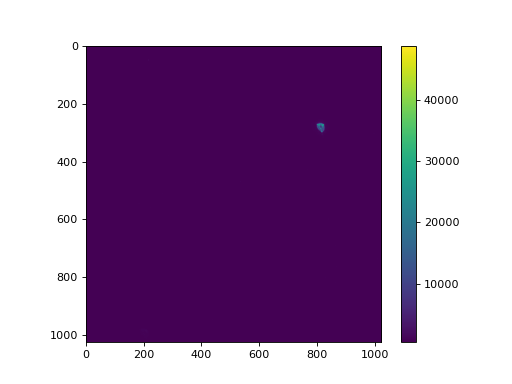

In [10]:
fig, ax = pl.subplots()
im = ax.imshow(hdul[1].data)
pl.colorbar(im);

You can see that the origin of the pixels numbering is on the upper left, which for images is a bit counter-intuitive.

Also there is a lot of [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) that you can choose from. In DS9, we have seen that we see much more with a [logarithmic color scale](https://matplotlib.org/stable/tutorials/colors/colormapnorms.html). 

<IPython.core.display.Javascript object>


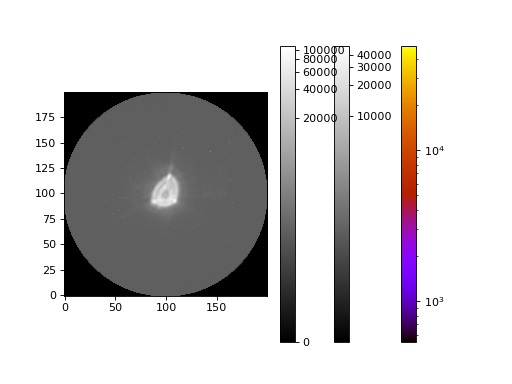

In [11]:
import matplotlib.colors as colors
fig, ax = pl.subplots()

im = ax.imshow(hdul[1].data, origin="lower", cmap=pl.get_cmap("gnuplot"),
          norm=colors.LogNorm(),)
pl.colorbar(im);

We can obtain mostly same behaviors than in DS9 with [astropy.visualisation](https://docs.astropy.org/en/stable/visualization/normalization.html)

In [12]:
from astropy.visualization import simple_norm

norm = simple_norm(hdul[1].data, 'log')

im = pl.imshow(hdul[1].data, origin='lower', norm=norm, cmap=pl.get_cmap("gray"))
pl.colorbar(im);

<IPython.core.display.Javascript object>


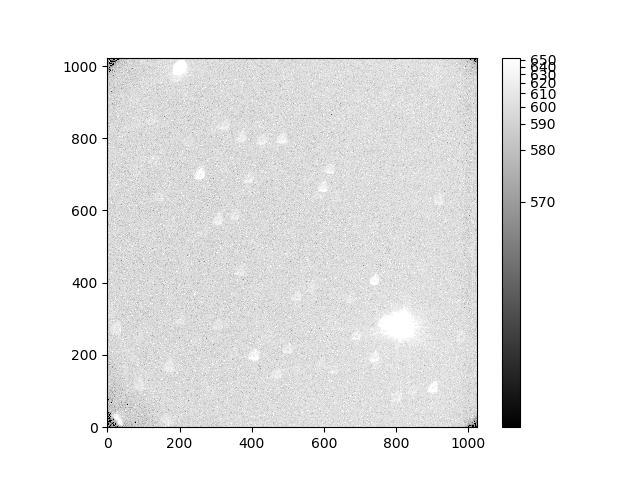

In [22]:
from astropy.visualization import ZScaleInterval

zscale = ZScaleInterval()
zlims = zscale.get_limits(hdul[1].data)
norm = simple_norm(hdul[1].data, 'log', min_cut=zlims[0], max_cut=zlims[1])

im = pl.imshow(hdul[1].data, origin='lower', norm=norm, cmap=pl.get_cmap("gray"))
pl.colorbar(im);

In [23]:
hdul.close()

Did you forgot about closing the file ?!

[Top page](#title_ID)

***

<a id="SubArray_ID"></a>
# The SubArray images

Now let's have a look at the main data we are going to work with: The SubArray images

In [13]:
hdul = astropy.io.fits.open(path2files["SubArray"])

In [14]:
hdul.info()

Filename: ../PT_Data/KELT-11/CH_PR300024_TG000101_TU2020-03-09T14-50-41_SCI_RAW_SubArray_V0101.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SCI_RAW_SubArray    1 ImageHDU        99   (200, 200, 1535)   int32 (rescales to uint32)   
  2  SCI_RAW_BlankLeft    1 ImageHDU        82   (8, 200, 1535)   float32   
  3  SCI_RAW_BlankRight    1 ImageHDU        82   (8, 200, 1535)   float32   
  4  SCI_RAW_DarkLeft    1 ImageHDU        82   (16, 200, 1535)   float32   
  5  SCI_RAW_DarkRight    1 ImageHDU        82   (16, 200, 1535)   float32   
  6  SCI_RAW_DarkTop    1 ImageHDU        82   (200, 3, 1535)   float32   
  7  SCI_RAW_OverscanLeft    1 ImageHDU        82   (4, 200, 1535)   float32   
  8  SCI_RAW_OverscanTop    1 ImageHDU        82   (200, 6, 1535)   float32   
  9  SCI_RAW_ImageMetadata    1 BinTableHDU    178   1535R x 35C   [1K, 26A, 1D, 1D, 1D, 1K, 26A, 1I, 1J, 1B, 1I, 1I, 5A, 1E, 1E, 1E, 1E, 1E, 1E, 

The structure is sensibly the same than the one of the FullArray image, expect that this time, it is a time series (and the size of the images, obviously)

In [16]:
hdul[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  200 / length of data axis 1                          
NAXIS2  =                  200 / length of data axis 2                          
NAXIS3  =                 1535 / length of data axis 3                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
BZERO   =           2147483648 / offset data range to that of unsigned long     
BSCALE  =                    1 / default scaling factor                         
DATE    = '2020-06-16T09:35:42' / creation time of this HDU                     
STAMP   = 'visit_combination 12.3.6' / program creating this HDU                
SVN_REV = '21621   '        

Let's load and plot the data

In [17]:
im_TS = hdul[1].data
t,y,x = im_TS.shape

<IPython.core.display.Javascript object>


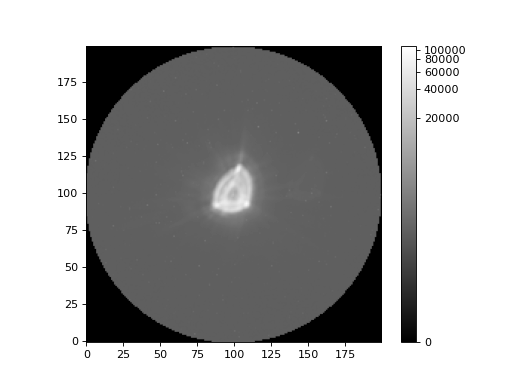

In [19]:
idx = 100

norm = simple_norm(im_TS, 'log')

im = pl.imshow(im_TS[idx], origin='lower', norm=norm, cmap=pl.get_cmap("gray"))
pl.colorbar(im);

In order to reduce the data, we will need to access the CCD margins

In [32]:
hdul["SCI_RAW_DarkLeft"].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                   16 / length of data axis 1                          
NAXIS2  =                  200 / length of data axis 2                          
NAXIS3  =                 1535 / length of data axis 3                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
DATE    = '2020-06-16T09:35:47' / creation time of this HDU                     
STAMP   = 'visit_combination 12.3.6' / program creating this HDU                
SVN_REV = '21621   '           / svn revision of the software creating this HDU 
EXTNAME = 'SCI_RAW_DarkLeft'   / extension name                                 
SCHEMA  = 'SCI_RAW_DarkLeft.

In [33]:
dark_left = hdul["SCI_RAW_DarkLeft"].data
dark_left.shape

(1535, 200, 16)

<IPython.core.display.Javascript object>


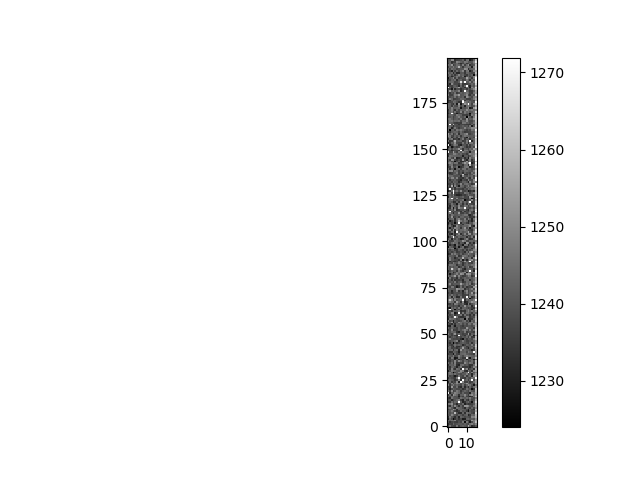

In [34]:
zscale = ZScaleInterval()
zlims = zscale.get_limits(dark_left)
norm = simple_norm(dark_left, 'linear', min_cut=zlims[0], max_cut=zlims[1])

im = pl.imshow(dark_left[10], origin='lower', norm=norm, cmap=pl.get_cmap("gray"))
pl.colorbar(im);

We proceed the same way to access all CCD margins.

Finally, we might need to access additional information about these images. At least the time at which each images has been observed. This information is stored in the metadata.

In [35]:
hdul["SCI_RAW_ImageMetadata"].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  216 / width of table in bytes                        
NAXIS2  =                 1535 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   35 / number of fields in each row                   
TTYPE1  = 'OBT_TIME'           / On board time, middle of the measurements      
TFORM1  = '1K      '           / format of field                                
TUNIT1  = 'OBT     '           / Unit of column OBT_TIME                        
TTYPE2  = 'UTC_TIME'           / UTC time, middle of the measurements           
TFORM2  = '26A     '        

In [36]:
table = hdul["SCI_RAW_ImageMetadata"].data
print(f"The length of the table is {len(table)}")
print(f"It's columns are {table.columns}")

The length of the table is 1535
It's columns are ColDefs(
    name = 'OBT_TIME'; format = '1K'; unit = 'OBT'; null = -1
    name = 'UTC_TIME'; format = '26A'; unit = 'TIMESYS=UTC'
    name = 'MJD_TIME'; format = '1D'; unit = 'day'
    name = 'LOS_TO_SUN_ANGLE'; format = '1D'; unit = 'deg'
    name = 'LOS_TO_MOON_ANGLE'; format = '1D'; unit = 'deg'
    name = 'OBT_CE_TIME'; format = '1K'; unit = 'OBT'; null = -1
    name = 'UTC_CE_TIME'; format = '26A'; unit = 'TIMESYS=UTC'
    name = 'CE_COUNTER'; format = '1I'; bscale = 1; bzero = 32768
    name = 'CE_SIZE'; format = '1J'; bscale = 1; bzero = 2147483648
    name = 'CE_INTEGRITY'; format = '1B'
    name = 'CCD_TIMING_SCRIPT'; format = '1I'; bscale = 1; bzero = 32768
    name = 'PIX_DATA_OFFSET'; format = '1I'; unit = 'ADU'; bscale = 1; bzero = 32768
    name = 'HK_SOURCE'; format = '5A'
    name = 'HK_VOLT_FEE_VOD'; format = '1E'; unit = 'V'
    name = 'HK_VOLT_FEE_VRD'; format = '1E'; unit = 'V'
    name = 'HK_VOLT_FEE_VOG'; format = 

The meaning of the format can be found [here](https://docs.astropy.org/en/stable/io/fits/usage/table.html).
The time is provided in different format. The format that we are going to use is "MJD" for Modified Julian data. It's the BJD_TDB - 2 400 000. 

In [38]:
table['MJD_TIME'].shape

(1535,)

[Top page](#title_ID)

***

<a id="Imagette_ID"></a>
# The Imagette

You can now explore the imagettes yourself using the same commands.